In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, classification_report, accuracy_score, precision_score, recall_score

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from zodiac.zodiac import Zodiac

import warnings
warnings.filterwarnings('ignore')

## Load the data and store test and train labels seperately

In [2]:
#Load Data

data = load_breast_cancer()


In [3]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)


In [4]:
df["Result"] = data.target

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
train_x = train["Result"]
del train["Result"]

In [7]:
res = np.array(test["Result"])
del test["Result"]

## Train your models. For our experiments we will be trying two models: 
### 1) SVM Model

In [8]:
#Train the model

clf = SVC(gamma='auto')
clf.fit(train, train_x) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
#Generate Predictions


SVM_predictions = clf.predict(test)


In [10]:
#overall accuracy score is 0.6
print(classification_report(res,SVM_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



## 2) Random Forest

In [11]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
RF_pred = clf.predict(test)

In [13]:
print(classification_report(res,RF_pred)) #overall accuracy is at 0.97

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Using zodiac for manual plots

In [14]:
#SVM ZODIAC
SVM_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=SVM_predictions, model_type="binaryclass",dim_red="PCA")

In [15]:
#RF ZODIAC
RF_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=RF_pred, model_type="binaryclass",dim_red="PCA")

In [16]:
SVM_zod.set_metrics(metrics=["f1","accuracy","recall","precision"]) #set required metrics

SVM_zod.split_manual_grid(h=100) #split manual grid with height 50

Setting metrics..
Metrics set
Splitting the data into grids...
Generating density matrix...
Completed


In [17]:
RF_zod.set_metrics(metrics=["f1","accuracy","recall","precision"]) #set required metrics

RF_zod.split_manual_grid(h=100) #split manual grid with height 50

Setting metrics..
Metrics set
Splitting the data into grids...
Generating density matrix...
Completed


<Figure size 432x288 with 0 Axes>

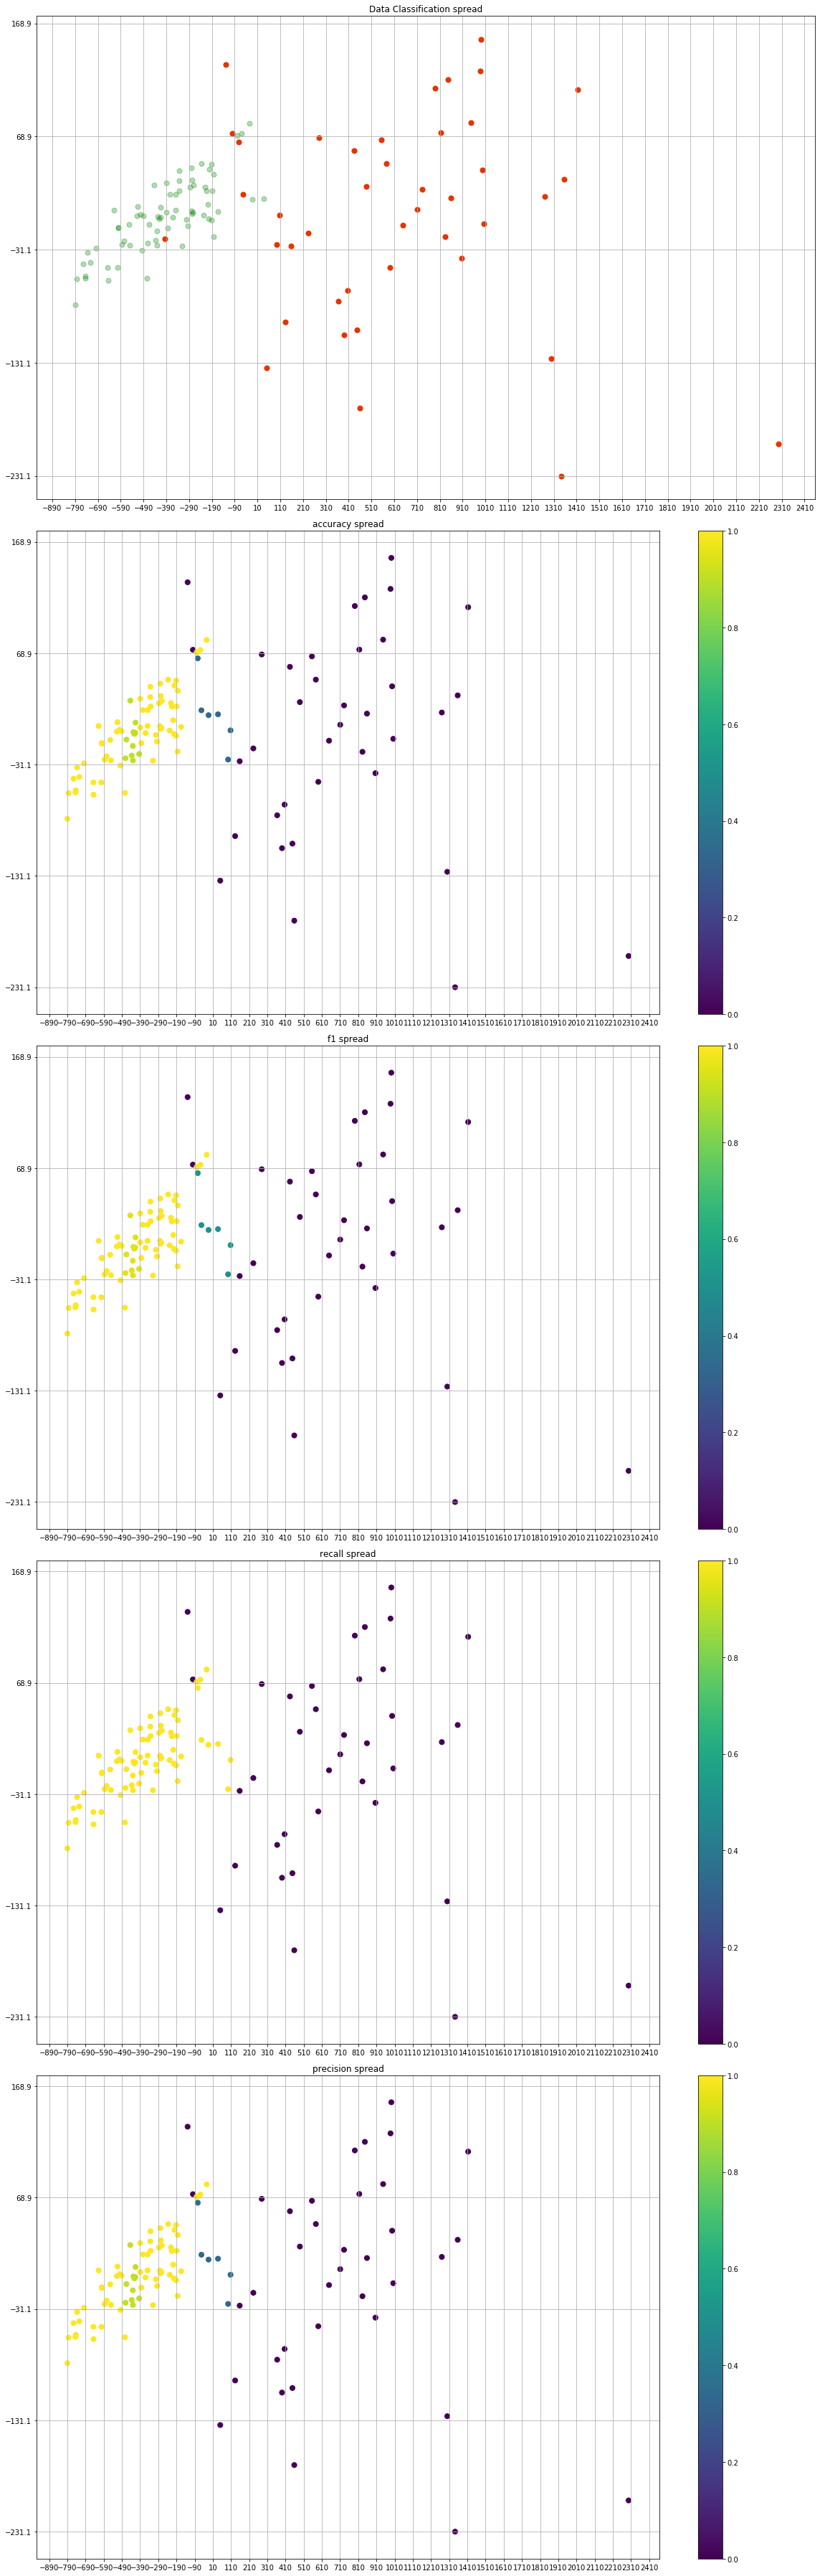

In [18]:
SVM_zod.split_plot(metrics=["accuracy","f1","recall","precision"]) #plot the metrics you'd like to visualiza

<Figure size 432x288 with 0 Axes>

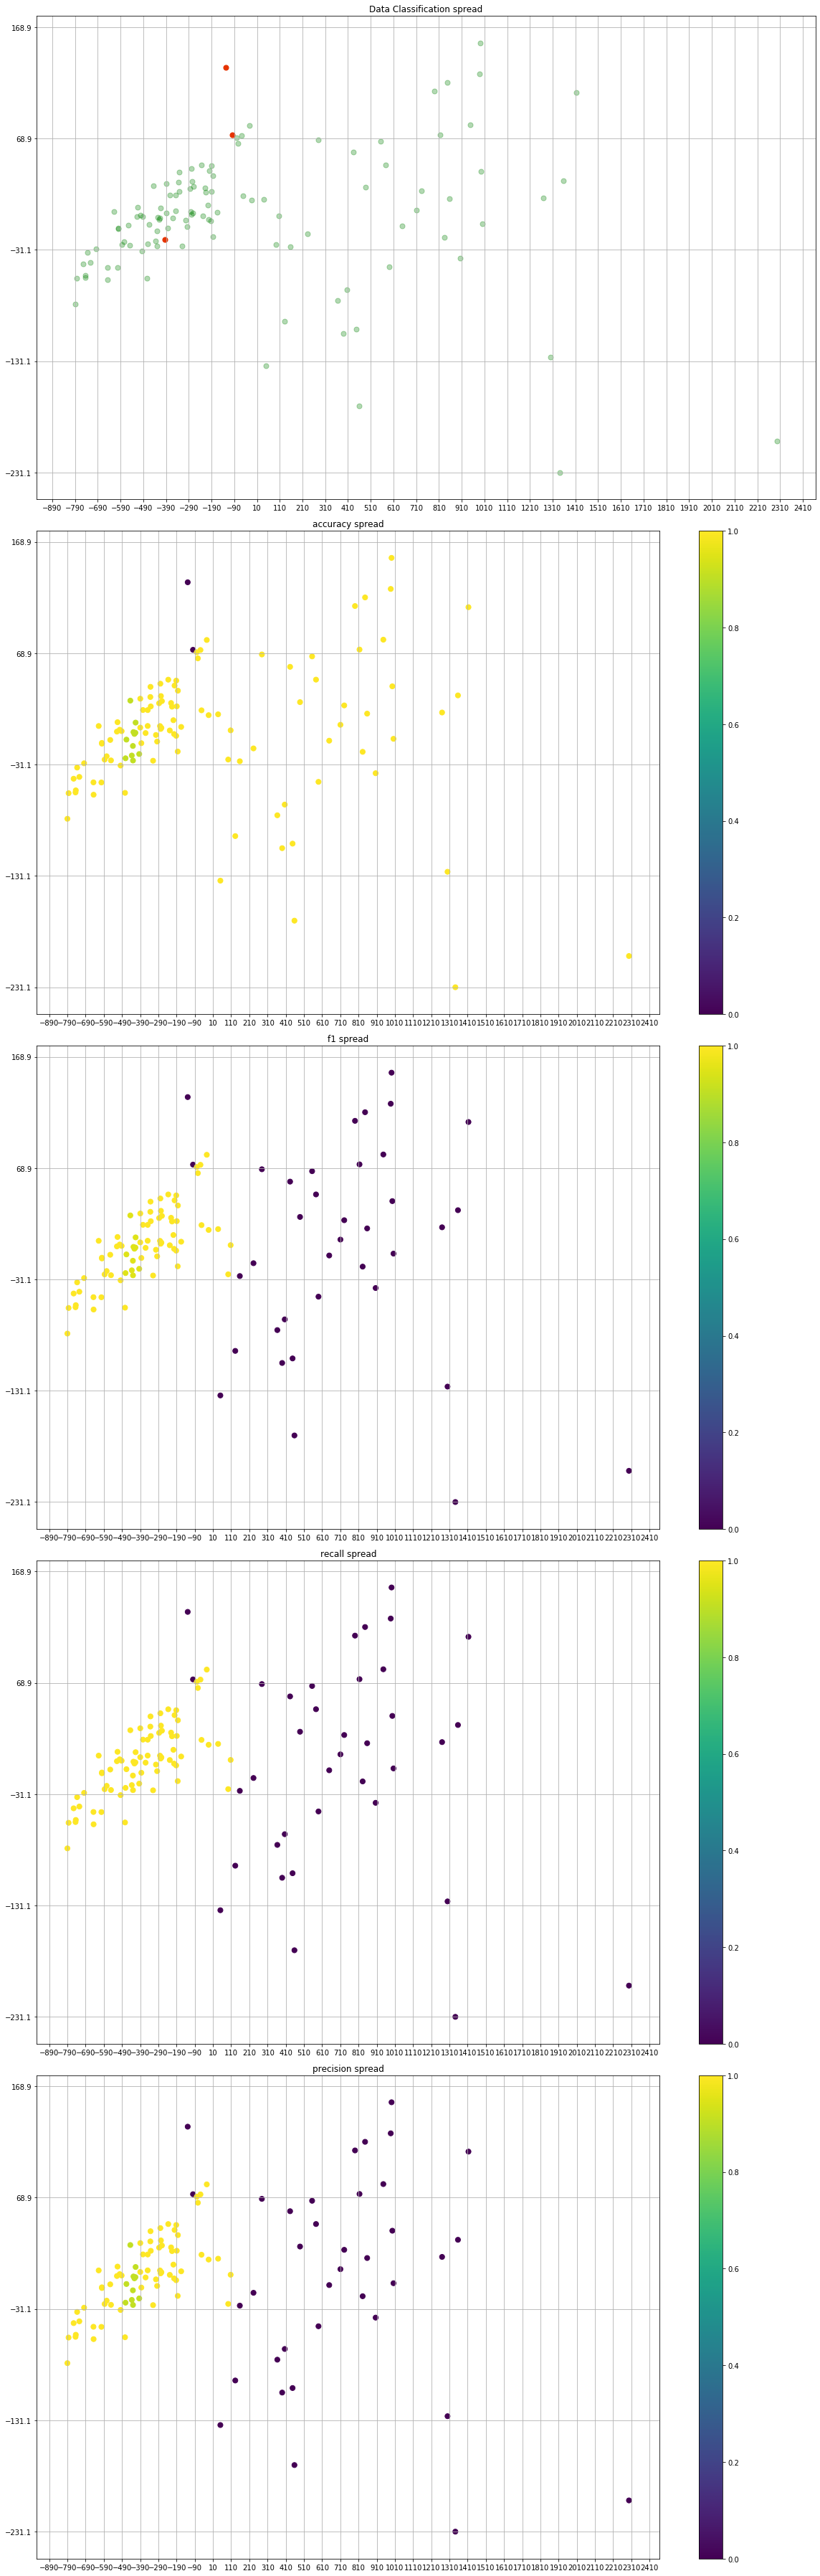

In [19]:
RF_zod.split_plot(metrics=["accuracy","f1","recall","precision"])

### It's interesting to note that although the overall accuracy score for RandomForest is a lot higher than SVM, on a local level the metric plots look very similar

### Using Zodiac to generate parzen windows and visualize metrics within that window

Generating parzen windows...
Completed.


<Figure size 432x288 with 0 Axes>

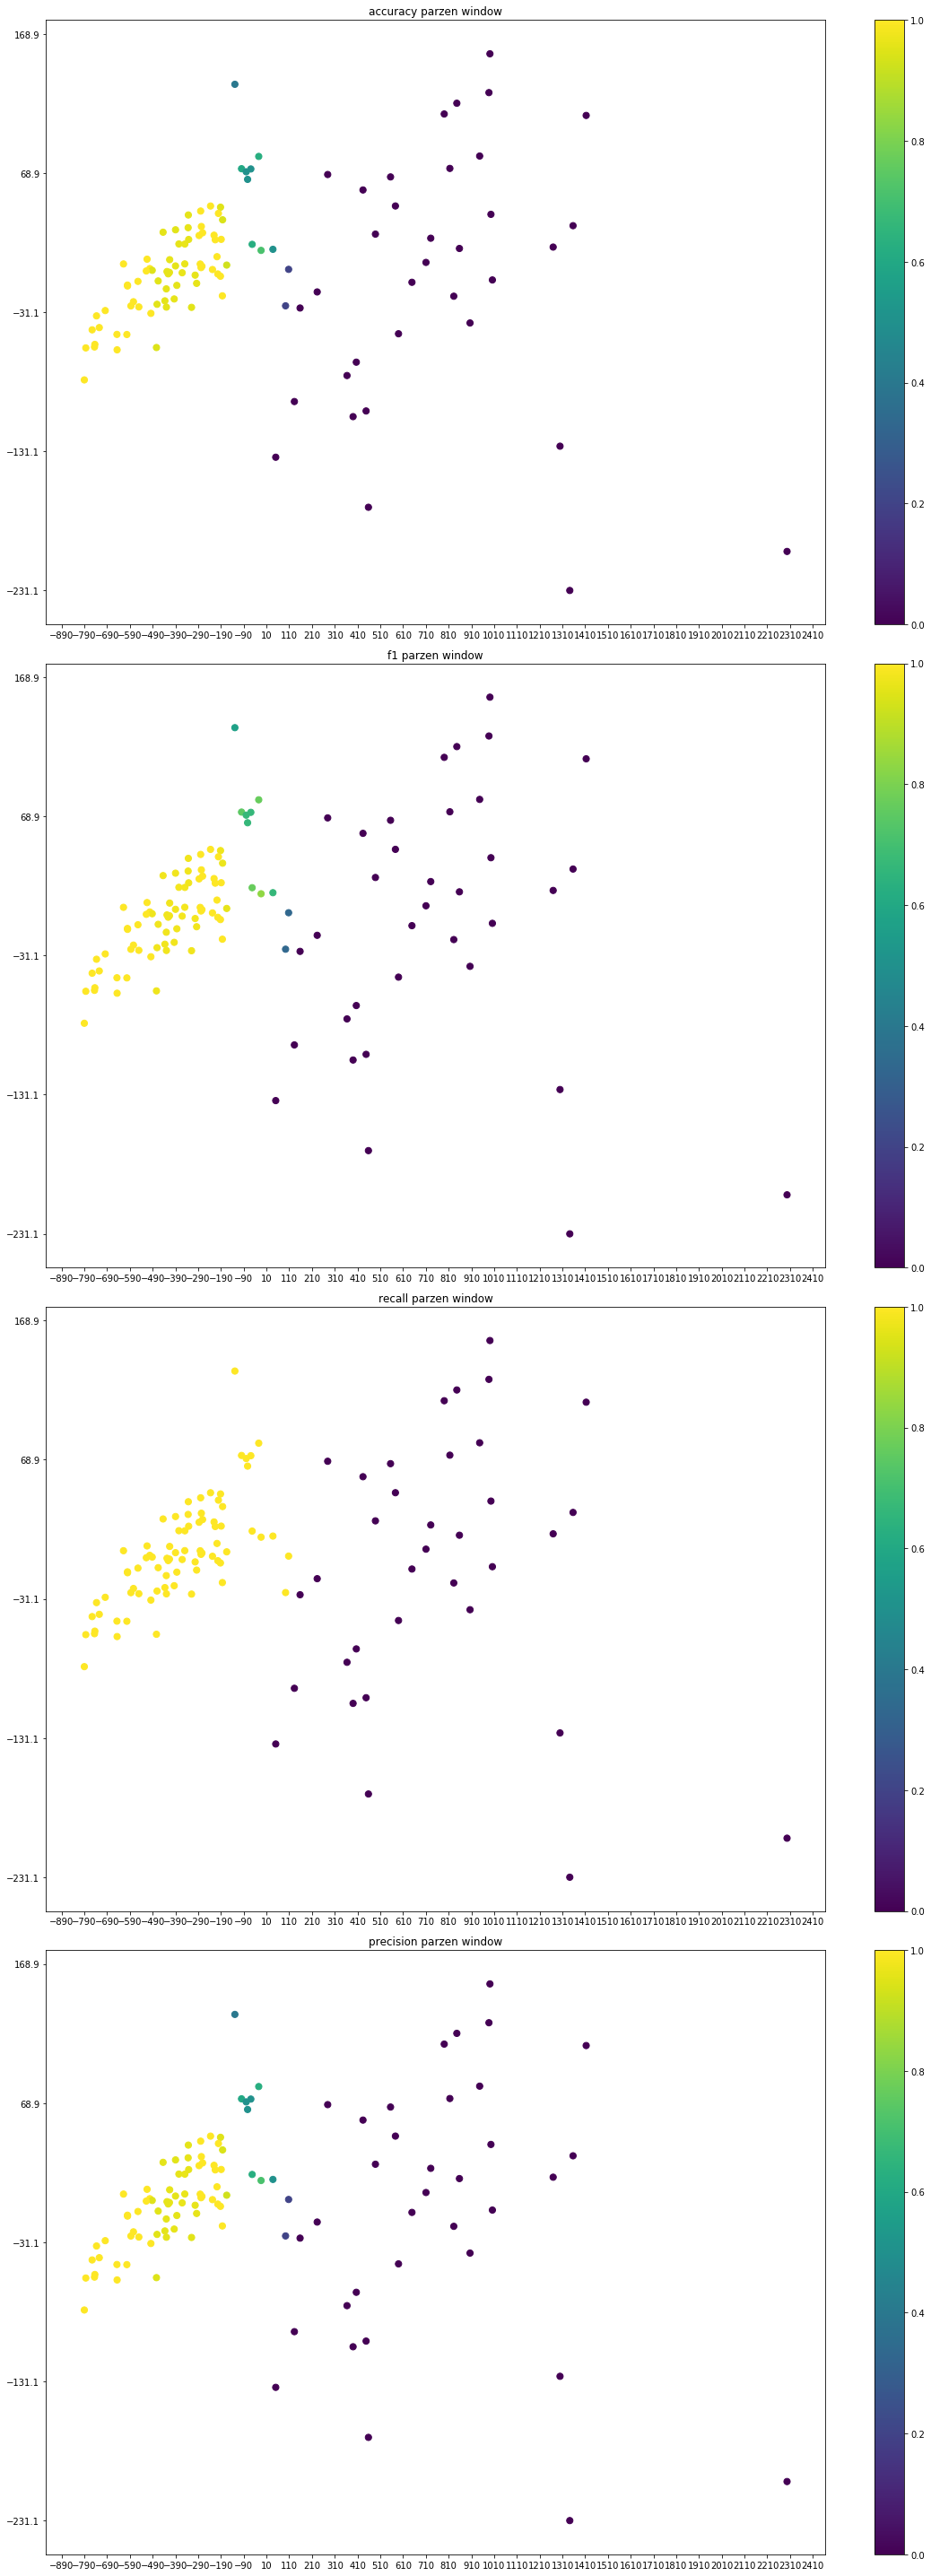

In [20]:
SVM_zod.gen_parzen(radius = 100)

SVM_zod.parzen_plot(metrics=["accuracy","f1","recall","precision"])

In [21]:
RF_zod.gen_parzen(radius=100)

Generating parzen windows...
Completed.


<Figure size 432x288 with 0 Axes>

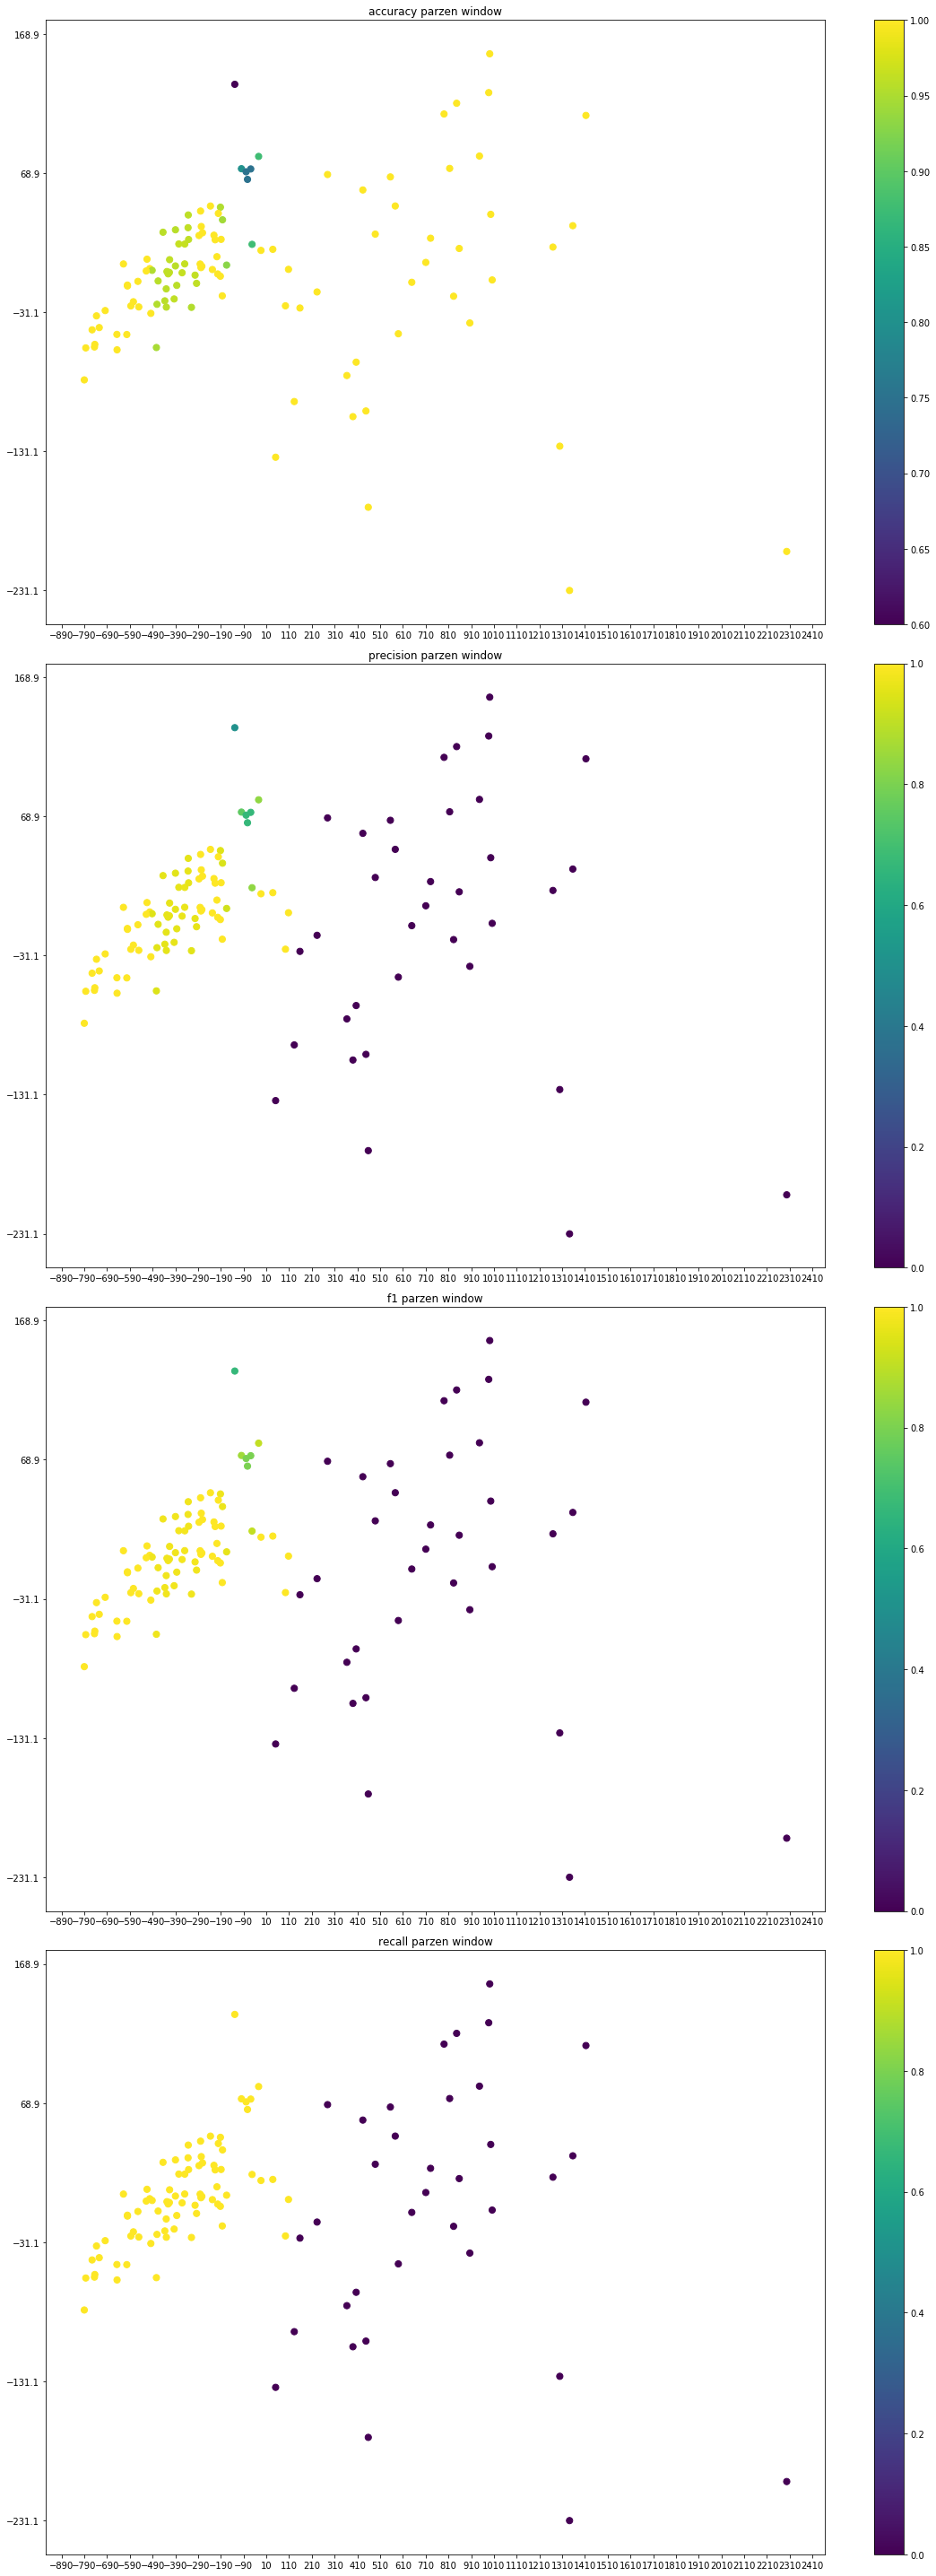

In [22]:
RF_zod.parzen_plot(metrics=["accuracy","precision","f1","recall"])

### Again the recall, f1, and precision plots for Random Forest also seem to have many local low socres for sparse data points, although the overall scores for these metrics are pretty high